In [1]:
import warnings
warnings.filterwarnings('ignore')
from __future__ import division
%config InlineBackend.figure_format = 'retina'
%pylab inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.path as mplPath
import matplotlib.patches as patches
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

reload(sys)
sys.setdefaultencoding('utf-8')

from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import shapefile

import urllib2


print matplotlib.matplotlib_fname()
from sys import platform


from scipy import optimize, special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


#from translate import translator
import goslate
from textblob import TextBlob
from textblob_de import TextBlobDE
import fileinput
import goslate
proxy_handler = urllib2.ProxyHandler({"http" : "http://proxy-domain.name:8080"})
proxy_opener = urllib2.build_opener(urllib2.HTTPHandler(proxy_handler),
                                    urllib2.HTTPSHandler(proxy_handler))

if platform == "linux" or platform == "linux2":
    prefix = "/home/massaro/"
elif platform == "darwin":
    prefix = "/Users/emanuele/"
    
font = {'family': 'sans-serif',
        'sans-serif' : 'Arial',
        'weight': 'normal',
        'size': 18}
plt.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Municipale Boundaries
pathShape = prefix+'Dropbox (MIT)/HERUS_Lab/SwissDateset/boundaries/'
sf = shapefile.Reader(pathShape+"municipalities.shp")
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)

In [3]:
def remove_non_ascii_2(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])


In [4]:
def plotMap(df, name, string, title, show, sf, colormap):
    recs    = sf.records()
    shapes  = sf.shapes()
    Nshp    = len(shapes)
    
    cmap = plt.get_cmap(colormap)
    norm = matplotlib.colors.Normalize(min(df[string]), max(df[string]))
    color_producer = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    missingCities = []
    fig,ax = plt.subplots(figsize=(18,13))
    cout = 0
    tot = 0
    l = []
    for nshp in xrange(Nshp):
        if recs[cout][15] not in l:
            l.append(recs[cout][15])
            tot+=1
        cc = 'cyan'
        ec = 'black'
        nameCity = recs[cout][15]
        tmpCity = df[df[name] == nameCity]
        if len(tmpCity) > 0:
            cc = color_producer.to_rgba( tmpCity[string][tmpCity.index[0]]  )
        else:
            missingCities.append([nameCity, cout, recs[cout][17]])
            if recs[cout][17]=='LI':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='DE':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='IT':
                cc = 'white'
                ec = 'white'
        cout+=1
        pts     = array(shapes[nshp].points)
        prt     = shapes[nshp].parts
        par     = list(prt) + [pts.shape[0]]
        bbPath = mplPath.Path(pts)
        ptchs   = []
        for pij in xrange(len(prt)):
            ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
            p = PatchCollection(ptchs,facecolor=cc, edgecolor=ec, linewidths = 1)
            ax.add_collection(p)
    ax.set_xlim(5.5, 11)
    ax.set_ylim(45.6,48.2)
    ax.set_xlabel('Latitude',size = 20)
    ax.set_ylabel('Longitude',size= 20)
    ax.set_title(title,size= 25)
    if show == 1:
        p.set(array= df[string].values, cmap=colormap)
        cbaxes = inset_axes(ax, width="50%", height="3%", loc=1) 
        plt.colorbar(p, cax=cbaxes, orientation='horizontal', format='%.0e')
    return missingCities


def returnT(num):
    return int((num // 1000))

In [5]:
def plotZipCode(df, name, string, title, show, sf, colormap, lg):
    recs    = sf.records()
    shapes  = sf.shapes()
    Nshp    = len(shapes)
    
    cmap = plt.get_cmap(colormap)
    norm = matplotlib.colors.Normalize(min(df[string]), max(df[string]))
    color_producer = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    missingCities = []
    fig,ax = plt.subplots(figsize=(18,12))
    cout = 0
    tot = 0
    l = []
    for nshp in xrange(Nshp):
        if recs[cout][15] not in l:
            l.append(recs[cout][15])
            tot+=1
        cc = 'cyan'
        ec = 'black'
        nameCity = recs[cout][15]
        tmpCity = df[df[name] == nameCity]
        if len(tmpCity) > 0:
            cc = color_producer.to_rgba( tmpCity[string][tmpCity.index[0]]  )
        else:
            missingCities.append([nameCity, cout, recs[cout][17]])
            if recs[cout][17]=='LI':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='DE':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='IT':
                cc = 'white'
                ec = 'white'
        cout+=1
        pts     = array(shapes[nshp].points)
        prt     = shapes[nshp].parts
        par     = list(prt) + [pts.shape[0]]
        bbPath = mplPath.Path(pts)
        ptchs   = []
        for pij in xrange(len(prt)):
            ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
            p = PatchCollection(ptchs,facecolor=cc, edgecolor=ec, linewidths = 1)
            ax.add_collection(p)
    ax.set_xlim(5, 11)
    ax.set_ylim(45.5,48)
    ax.set_xlabel('Latitude',size = 20)
    ax.set_ylabel('Longitude',size= 20)
    ax.set_title(title,size= 25)
    if show == 1:
        p.set(array= df[string].values, cmap=colormap)
        cbaxes = inset_axes(ax, width="50%", height="3%", loc=1) 
        plt.colorbar(p, cax=cbaxes, orientation='horizontal', format='%.0e')
    if lg == 1:
        plt.legend([patches.Patch(color= color_producer.to_rgba(1)),  
                    patches.Patch(color= color_producer.to_rgba(2)), 
                    patches.Patch(color= color_producer.to_rgba(3)),
                    patches.Patch(color= color_producer.to_rgba(4)),
                    patches.Patch(color= color_producer.to_rgba(5)),
                    patches.Patch(color= color_producer.to_rgba(6)),
                    patches.Patch(color= color_producer.to_rgba(7)),
                    patches.Patch(color= color_producer.to_rgba(8))], 
                   ['Western Switzerland\n(South)','Western Switzerland\n(North)',
                    'Bern/Upper Valais', 'Basel', 'Arau', 
                    'Central Switzerland\n(Innerschweiz)  Tessin', 'Graubünden', 
                    'Zürich', 'Eastern Switzerland (Ostschweiz)'], loc=2, prop={'size': 17})
    return missingCities

In [6]:
def plotCantons(df, name, string, title, show, sf, colormap, lst):
    recs    = sf.records()
    shapes  = sf.shapes()
    Nshp    = len(shapes)
    
    cmap = plt.get_cmap(colormap)
    norm = matplotlib.colors.Normalize(min(df[string]), max(df[string]))
    color_producer = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    missingCities = []
    fig,ax = plt.subplots(figsize=(18,12))
    cout = 0
    tot = 0
    l = []
    for nshp in xrange(Nshp):
        if recs[cout][15] not in l:
            l.append(recs[cout][15])
            tot+=1
        cc = 'cyan'
        ec = 'black'
        nameCity = recs[cout][15]
        tmpCity = df[df[name] == nameCity]
        if len(tmpCity) > 0:
            cc = color_producer.to_rgba( tmpCity[string][tmpCity.index[0]]  )
        else:
            missingCities.append([nameCity, cout, recs[cout][17]])
            if recs[cout][17]=='LI':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='DE':
                cc = 'white'
                ec = 'white'
            if recs[cout][17]=='IT':
                cc = 'white'
                ec = 'white'
        cout+=1
        pts     = array(shapes[nshp].points)
        prt     = shapes[nshp].parts
        par     = list(prt) + [pts.shape[0]]
        bbPath = mplPath.Path(pts)
        ptchs   = []
        for pij in xrange(len(prt)):
            ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
            p = PatchCollection(ptchs,facecolor=cc, edgecolor=ec, linewidths = 1)
            ax.add_collection(p)
    ax.set_xlim(5, 11)
    ax.set_ylim(45.5,48)
    ax.set_xlabel('Latitude',size = 20)
    ax.set_ylabel('Longitude',size= 20)
    ax.set_title(title,size= 25)
    if show == 1:
        p.set(array= df[string].values, cmap=colormap)
        cbaxes = inset_axes(ax, width="50%", height="3%", loc=1) 
        plt.colorbar(p, cax=cbaxes, orientation='horizontal', format='%.0e')
    tmpColr = []
    nameC = []
    for i in lst.index:
        tmpColr.append(patches.Patch(color= color_producer.to_rgba(i)))
        nameC.append(lst['cantonAbbr'][i])
    plt.legend(tmpColr, nameC,  loc=2, prop={'size': 17})
    return missingCities

In [7]:
### Locality Postal Code
path = prefix + 'Dropbox (MIT)/HERUS_Lab/SwissDateset/localityPostalCode/zipCodes.csv'
zipCodes = pd.read_csv(path, sep= ' ', encoding='utf-8')
col = ['cityName', 'zipCode', 'additionalClause', 'communityName', 'BFS-Nr', 'cantonAbbreviation', 'E', 'N']
zipCodes.columns = col
zipCodes['cityName'] = zipCodes['cityName'].apply(remove_non_ascii_2)

In [8]:
### Data
path = prefix+'Dropbox (MIT)/HERUS_Lab/SwissDateset/keyData/keyData2017.csv'
keyData2017 = pd.read_csv(path, sep=' ', encoding='utf-8')
data = pd.DataFrame()
keyData2017['Name of commune'][2120] = "Crans-Montana"
data['communeName'] = keyData2017['Name of commune']
data['communeName'] = data['communeName'].apply(remove_non_ascii_2)

In [9]:
zipCodes.columns

Index([u'cityName', u'zipCode', u'additionalClause', u'communityName',
       u'BFS-Nr', u'cantonAbbreviation', u'E', u'N'],
      dtype='object')

In [10]:
tmp = pd.DataFrame()
tmp['communityName'] = zipCodes['communityName']
tmp['zipCode'] = zipCodes['zipCode']
tmp['canton'] = zipCodes['cantonAbbreviation']
tmp['communityName'] = tmp['communityName'].apply(remove_non_ascii_2)
tmp['uniqueZipCode'] = tmp['zipCode'].apply(returnT)
#ms = plotMap(tmp, 'communityName', 'uniqueZipCode', 'Postal Code', 0, sf, 'Dark2')

In [11]:
missing = []
zips = []
cantons = []
data['communeNameRevised'] = data['communeName']
for i,j in enumerate(data['communeNameRevised']):
    if j not in list(tmp['communityName']):
        cm = zipCodes[zipCodes['cityName'] == j ]
        zips.append(cm.zipCode[cm.index[0]])
        cantons.append(cm.cantonAbbreviation[cm.index[0]])
        if len(cm > 0):
            data['communeNameRevised'][i] = cm['cityName'][cm.index[0]]
        else:
            missing.append(j)
    else:
        f = tmp[tmp['communityName'] == j]
        zips.append(f.zipCode[f.index[0]])
        cantons.append(f.canton[f.index[0]])
data['zipCode'] = zips
data['cantonAbbreviation'] = cantons

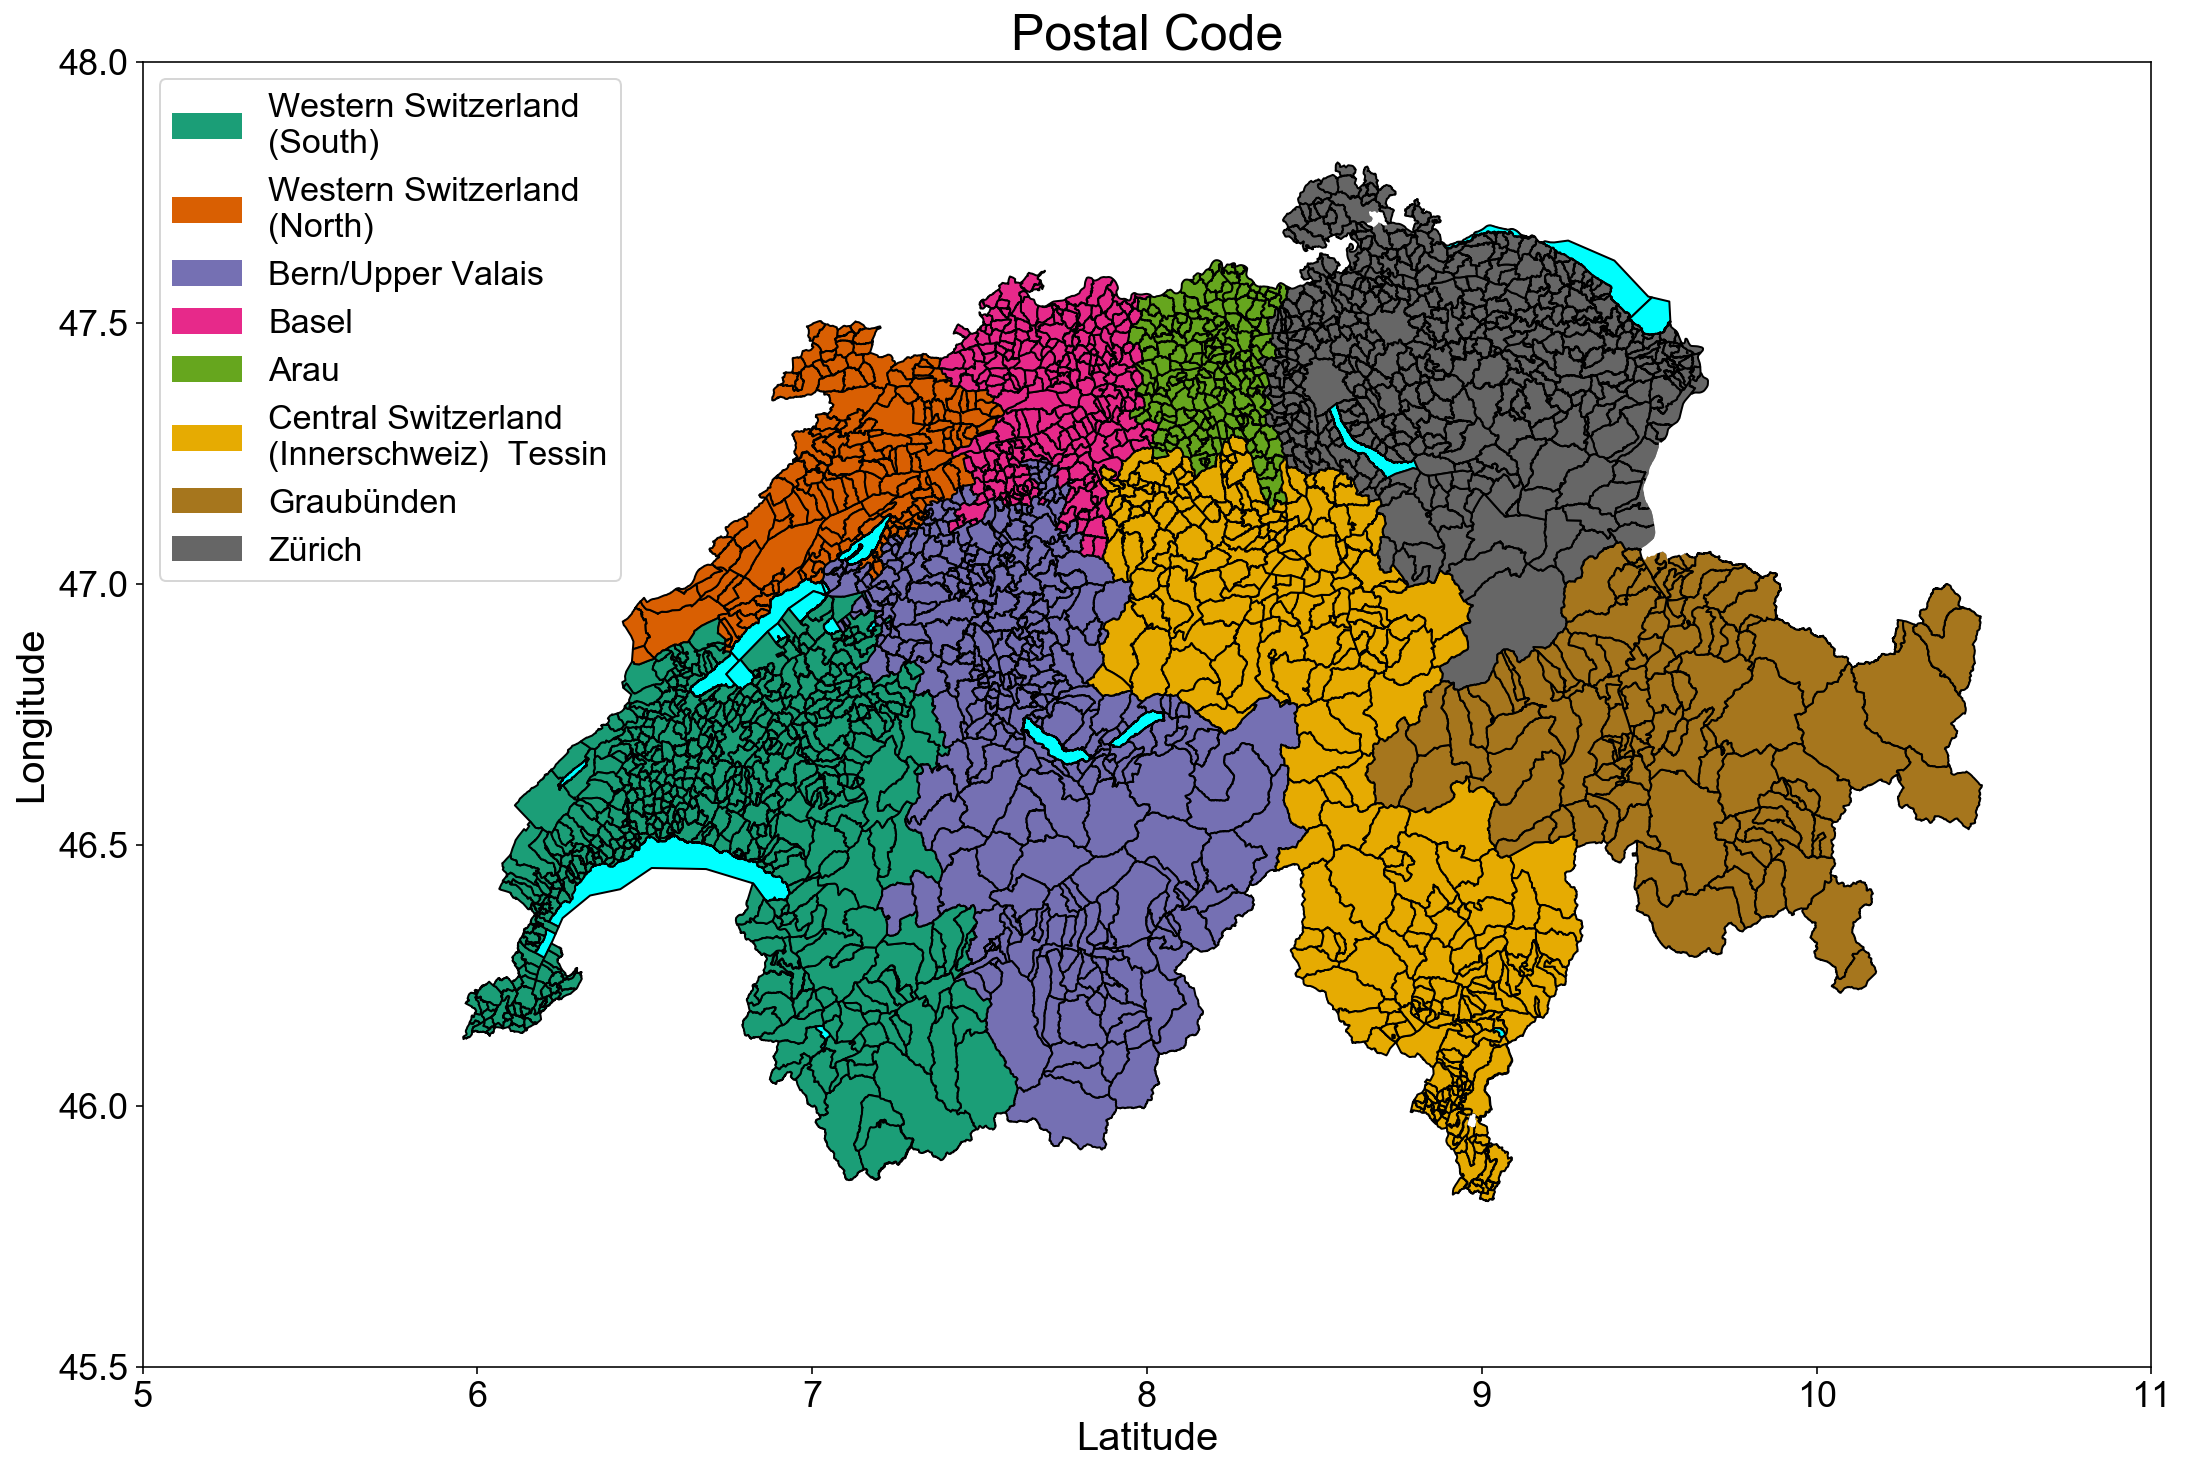

In [12]:
data['uniqueZipCode'] = data['zipCode'].apply(returnT)
ms1 = plotZipCode(data, 'communeNameRevised', 'uniqueZipCode', 'Postal Code', 0, sf, 'Dark2',1)

In [13]:
canton = pd.DataFrame()
canton['A'] = data['cantonAbbreviation']
names = pd.unique(canton.values.ravel())
names = pd.Series(np.arange(len(names)), names)
canton = canton.applymap(names.get)

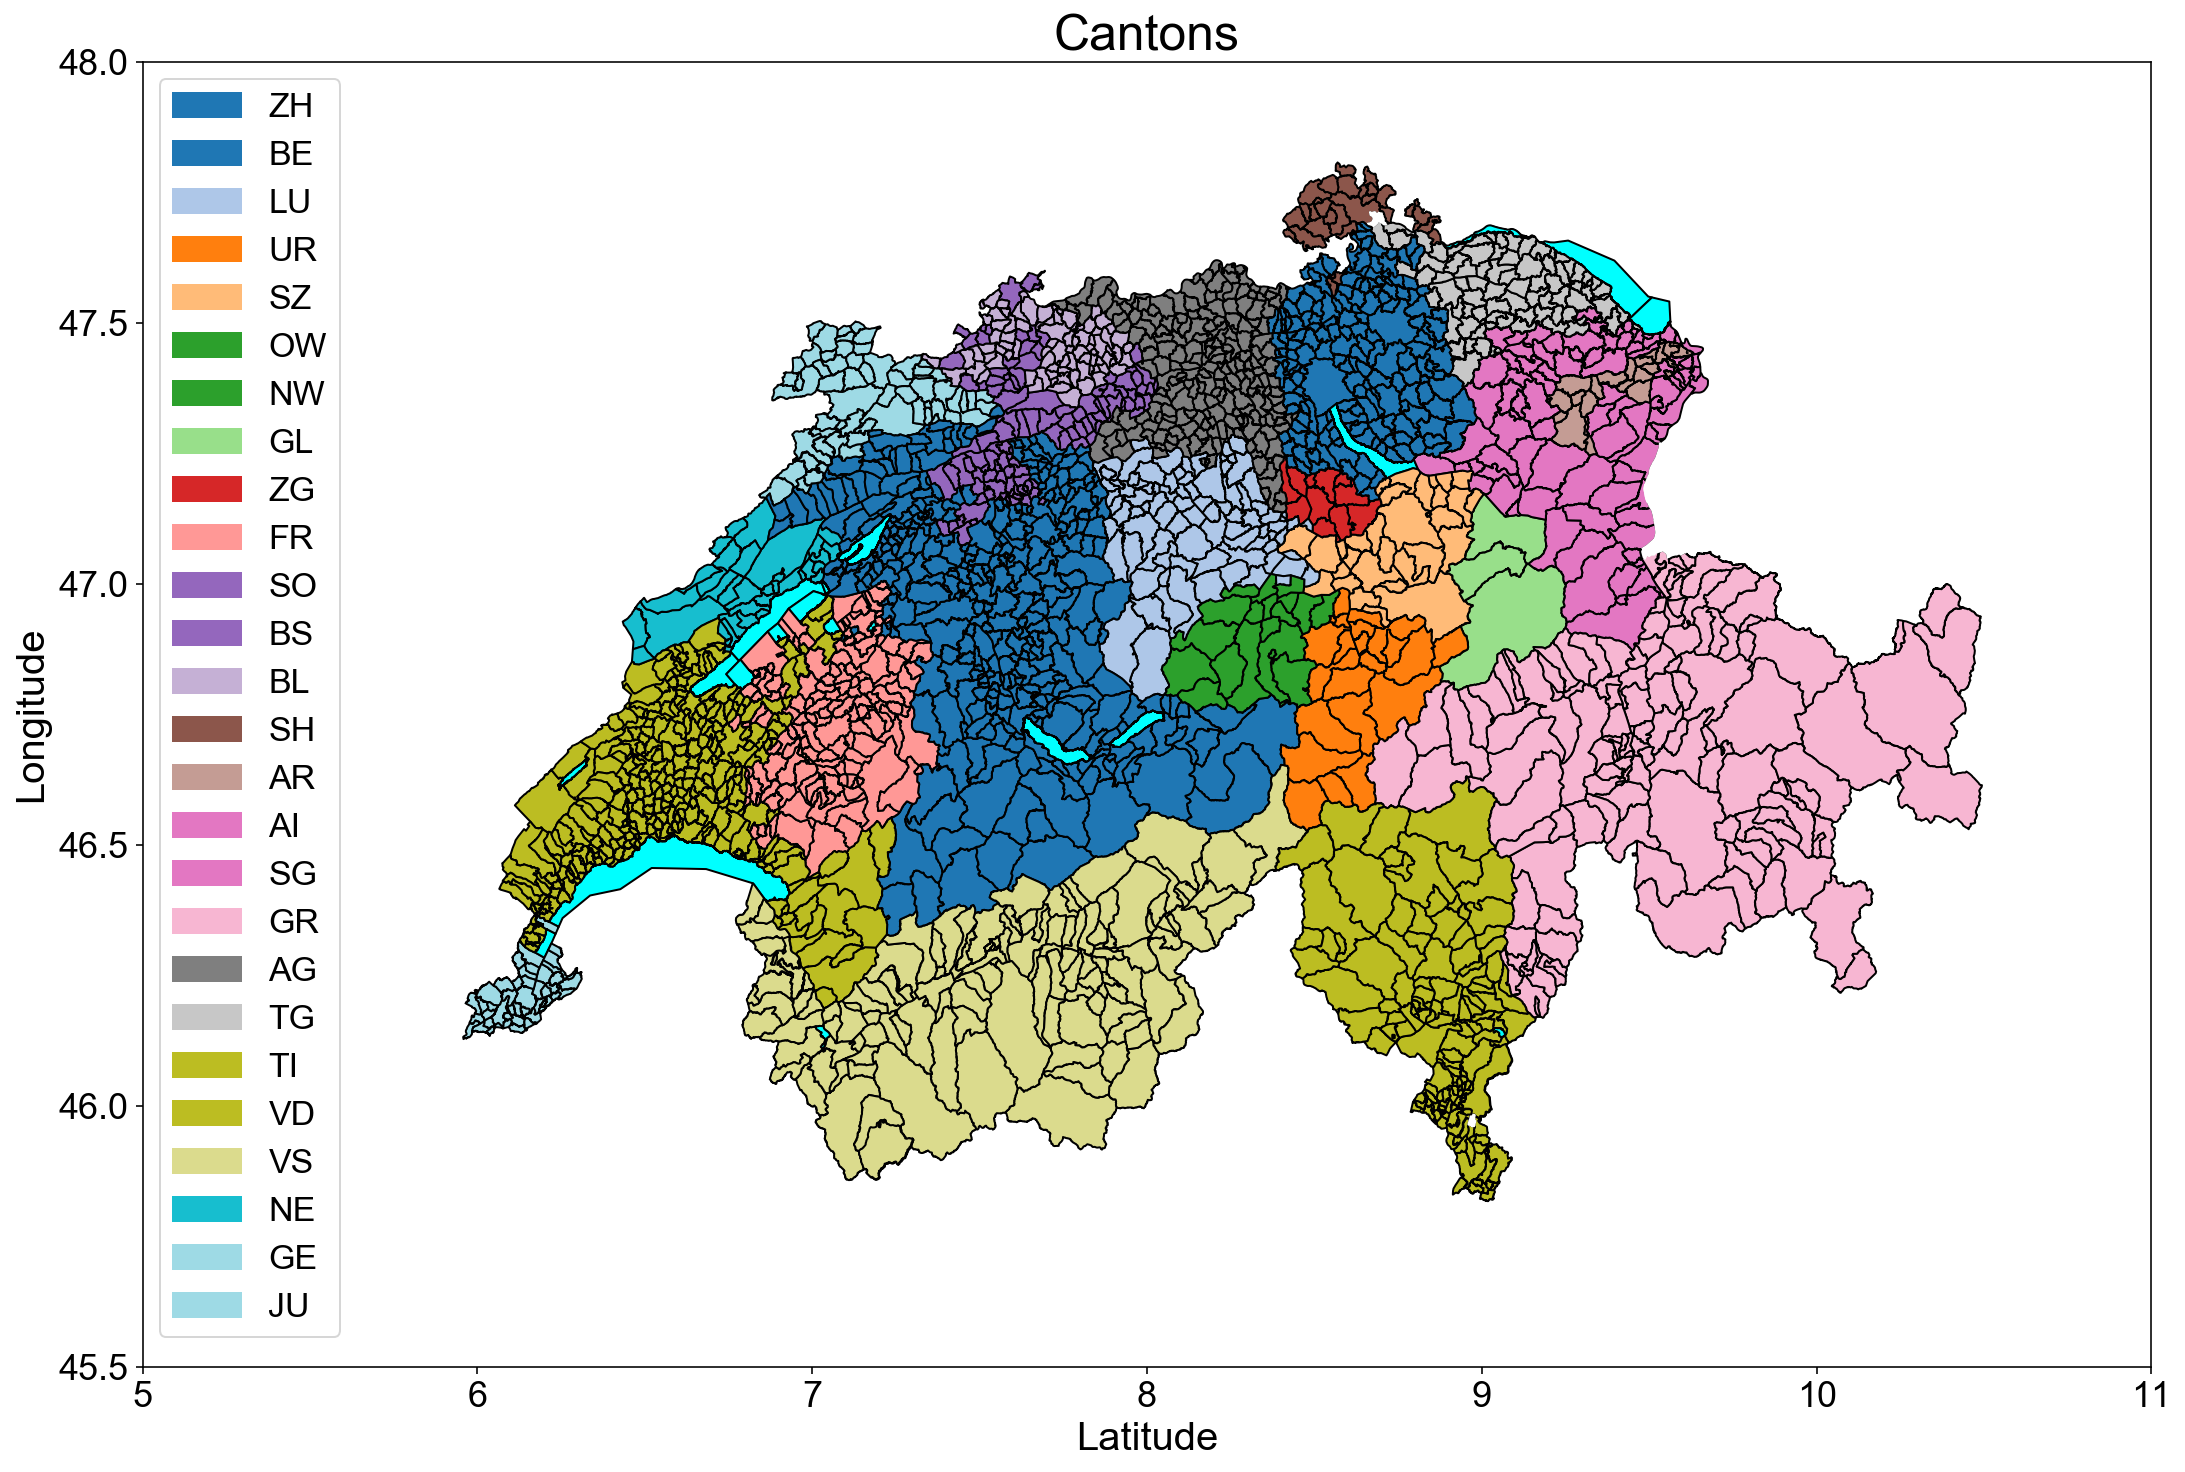

In [14]:
data['cantonID'] = canton
nameC = pd.DataFrame(names)
nameC = nameC.reset_index()
nameC.columns = ['cantonAbbr', 'cantonID']
ms1 = plotCantons(data, 'communeNameRevised', 'cantonID', 'Cantons', 0, sf, 'tab20', nameC)

In [28]:
data[data.communeName == 'Zollikon']

,communeName,communeNameRevised,zipCode,cantonAbbreviation,uniqueZipCode,cantonID
115,Zollikon,Zollikon,8125,ZH,8,0
